<a href="https://colab.research.google.com/github/soukhind2/vgg16obj/blob/master/perf_increase_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

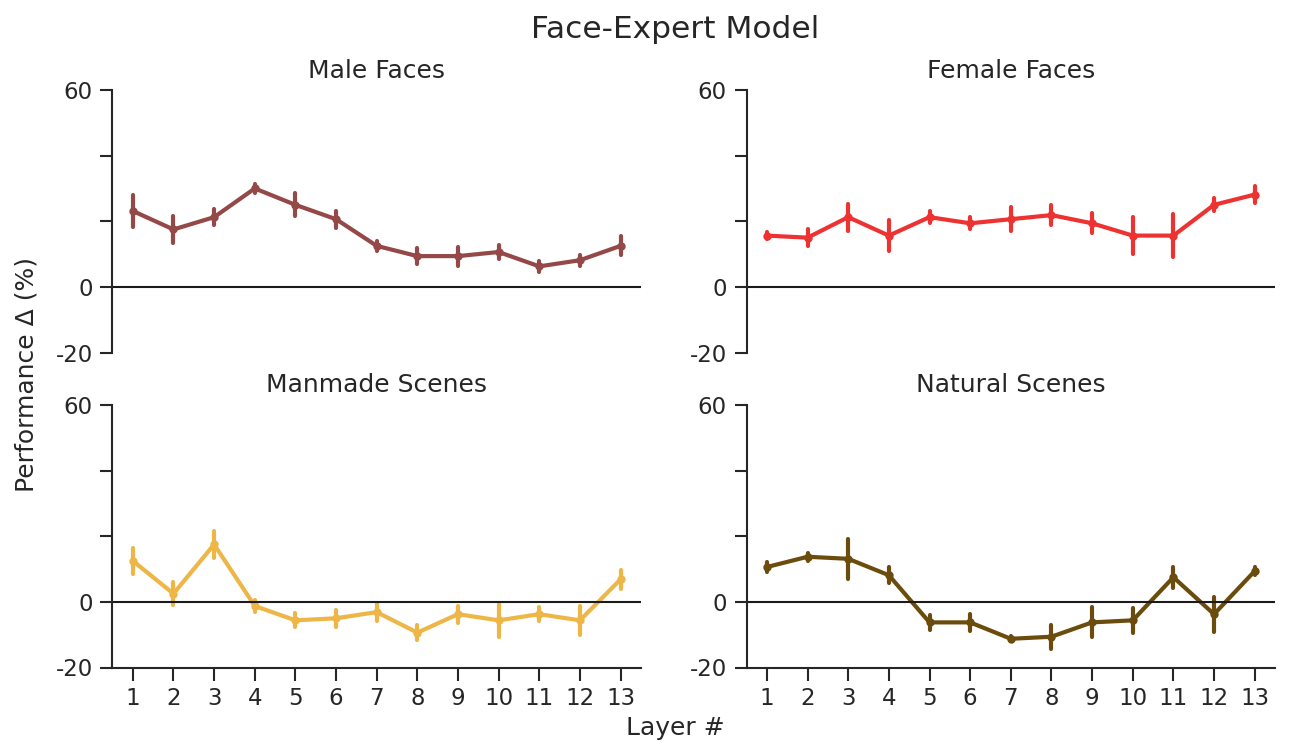

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
categories = ["Male Faces","Female Faces","Manmade Scenes","Natural Scenes"]
colors = ["#944848","#ed3232","#edb647","#6b4c0d"]

# acc = [0.60,0.60,0.50,0.50 ]
# gacc = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi1.npy')
# y = np.expand_dims(gacc,0)

# for i in range(2,7):
#   temp = np.load('/content/drive/MyDrive/objfiles/tun_accuracy_multi' + str(i) + '.npy')
#   y = np.concatenate((y,temp.reshape(1,4,13,5)))

acc = [0.45,0.5,0.60,0.60 ]
gacc = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi1.npy')
y = np.expand_dims(gacc,0)

temp = np.load('/content/drive/MyDrive/objfiles/vggface_tun_accuracy_multi2.npy')
y = np.concatenate((y,temp.reshape(1,4,13,5)))

y = np.amax(y,axis=0)


plt_data = np.zeros((4,13,5))
for i in range(13):
  for j in range(4):
    for k in range(5):
      plt_data[j,i,k] = y[j,i,k] - acc[j]


fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.set(style="white",rc={"lines.linewidth": 1})
sns.set(font_scale=1,style='ticks')
layer = 0
plt.rcParams['figure.dpi'] = 150
axes = axes.flatten()

for cats in range(4):
  sns.pointplot(plt_data[cats].T,ax = axes[cats],
                errorbar = 'se',markersize = 5,
                linewidth = 2, markers = ".",color = colors[cats])
  axes[cats].axhline(0,color='k',linewidth = 1)
  axes[cats].set_ylim(-0.2,0.6)
  axes[cats].set_yticks(np.arange(-0.2,0.8,0.2),["-20","0","","","60"])
  axes[cats].set_xticks(np.arange(0,13),["1","2","3","4","5","6","7","8","9","10","11","12","13"])
  axes[cats].set_title(categories[cats])

  axes[cats].spines['right'].set_visible(False)
  axes[cats].spines['top'].set_visible(False)
  axes[cats].spines['bottom'].set_visible(False)
  axes[cats].spines['left'].set_linewidth(1)
  axes[cats].spines['bottom'].set_linewidth(1)
  axes[cats].tick_params(width=1)

axes[2].spines['bottom'].set_visible(True)
axes[3].spines['bottom'].set_visible(True)

axes[0].tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
axes[1].tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False) #

fig.text(0.5, 0.02, 'Layer #', ha='center')
fig.text(0.06, 0.5, 'Performance Δ (%)', va='center', rotation='vertical')
fig.suptitle(' Face-Expert Model ', fontsize=15)

plt.savefig('/content/plots/vggfacetrain_count.png')  # saves the current figure
plt.savefig('/content/plots/vggfacetrain_count.jpeg')  # saves the current figure

In [158]:
! zip -r /plots /content/plots

  adding: content/plots/ (stored 0%)
  adding: content/plots/imtrain_count.jpeg (deflated 32%)
  adding: content/plots/imtrain_count.png (deflated 11%)
  adding: content/plots/vggfacetrain_count.png (deflated 11%)
  adding: content/plots/vggfacetrain_count.jpeg (deflated 31%)
